### Use the K-Means Clustering algorithm to explore patterns in the dataset. 

### Choose a few features (2~4) of the dataset to compare (for example, what do the clustering patterns of credit limit vs balance look like?, etc.) and feel free to try out different numbers of clusters. 

### Try to discover what makes each cluster distinct from another (clusters of low balance vs high balance? Are there groups of certain credit limits?, etc.). Use visualization if needed to identify trends in this data.

In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

# Market Basket Analysis

In [2]:
# read file into dataframe
filepath = "credit_card.csv"

df = pd.read_csv(filepath)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# remove CustomerID column
df.drop(['CUST_ID','BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','PRC_FULL_PAYMENT','TENURE'] ,axis=1, inplace=True)
# verify updated column
df.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,1000.0,201.802084,139.509787
1,3202.467416,0.00,7000.0,4103.032597,1072.340217
2,2495.148862,773.17,7500.0,622.066742,627.284787
3,1666.670542,1499.00,7500.0,0.000000,NaN
4,817.714335,16.00,1200.0,678.334763,244.791237


# Statistical Analysis

Before using the K-Means algorithm to find similar spending groups, we will explore the distributions for the features of our data, as well as some descriptive statistics. This may be useful to determine how many clusters we should set the K-Means algorithm to assign the customers.

In [4]:
df.shape

(8950, 5)

In [5]:
# check for missing values
df.isnull().sum()

BALANCE               0
PURCHASES             0
CREDIT_LIMIT          1
PAYMENTS              0
MINIMUM_PAYMENTS    313
dtype: int64

In [6]:
df.dropna(axis = 0,inplace= True)

In [7]:
df.shape

(8636, 5)

In [8]:
# overall descriptive statistics
df.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,1025.433874,4522.091030,1784.478099,864.304943
std,2095.571300,2167.107984,3659.240379,2909.810090,2372.566350
min,0.000000,0.000000,50.000000,0.049513,0.019163
25%,148.095189,43.367500,1600.000000,418.559237,169.163545
50%,916.855459,375.405000,3000.000000,896.675701,312.452292
75%,2105.195853,1145.980000,6500.000000,1951.142090,825.496463
max,19043.138560,49039.570000,30000.000000,50721.483360,76406.207520


## Checking and Dropping Outliners

In [9]:

## Calculate quartiles
q1 = df["BALANCE"].quantile(.25)
q3 = df["BALANCE"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)


################################
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)


###############################

## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

################################

## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = df.loc[(df['BALANCE'] > top) | (df['BALANCE'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

#################################

## Drop rows with above index values
df = df.drop(iqr_outliers)

## Re-check the shape of the dataframe, how many rows were dropped?
print(df.shape)

Q1: 148.095189
Q3: 2105.195853
IQR: 1957.100664
Upper Limit: 5040.8468490000005
Lower Limit: -2787.555807
INDEX VALUES: Int64Index([  15,   21,   24,   28,   30,   32,   36,   38,   44,   59,
            ...
            7962, 7963, 8026, 8151, 8217, 8309, 8411, 8438, 8705, 8941],
           dtype='int64', length=666)
(7970, 5)


In [10]:

## Calculate quartiles
q1 = df["CREDIT_LIMIT"].quantile(.25)
q3 = df["CREDIT_LIMIT"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)


################################
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)


###############################

## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

################################

## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = df.loc[(df['CREDIT_LIMIT'] > top) | (df['CREDIT_LIMIT'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

#################################

## Drop rows with above index values
df = df.drop(iqr_outliers)

## Re-check the shape of the dataframe, how many rows were dropped?
print(df.shape)

Q1: 1500.0
Q3: 6000.0
IQR: 4500.0
Upper Limit: 12750.0
Lower Limit: -5250.0
INDEX VALUES: Int64Index([   6,   18,   85,  136,  149,  155,  167,  178,  197,  200,
            ...
            5264, 5347, 5487, 5844, 6136, 6176, 6328, 6371, 7046, 7378],
           dtype='int64', length=169)
(7801, 5)


In [11]:

## Calculate quartiles
q1 = df["PAYMENTS"].quantile(.25)
q3 = df["PAYMENTS"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)


################################
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)


###############################

## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

################################

## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = df.loc[(df['PAYMENTS'] > top) | (df['PAYMENTS'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

#################################

## Drop rows with above index values
df = df.drop(iqr_outliers)

## Re-check the shape of the dataframe, how many rows were dropped?
print(df.shape)

Q1: 383.273938
Q3: 1692.52541
IQR: 1309.251472
Upper Limit: 3656.402618
Lower Limit: -1580.6032699999998
INDEX VALUES: Int64Index([   1,   23,   34,   39,   50,   57,   62,   64,   68,   71,
            ...
            8549, 8564, 8582, 8611, 8662, 8689, 8737, 8748, 8857, 8914],
           dtype='int64', length=754)
(7047, 5)


In [12]:

## Calculate quartiles
q1 = df["MINIMUM_PAYMENTS"].quantile(.25)
q3 = df["MINIMUM_PAYMENTS"].quantile(.75)

print("Q1:", q1)
print("Q3:", q3)


################################
## Calculate the IQR
iqr = q3 - q1

print("IQR:", iqr)


###############################

## Determine outlier fences 
top = q3 + (iqr * 1.5)
bottom = q1 - (iqr * 1.5)


print("Upper Limit:", top)
print("Lower Limit:", bottom)

################################

## Determine the index locations for rows that fall outside of outlier fences

iqr_outliers = df.loc[(df['MINIMUM_PAYMENTS'] > top) | (df['MINIMUM_PAYMENTS'] < bottom)].index

print("INDEX VALUES:", iqr_outliers)

#################################

## Drop rows with above index values
df = df.drop(iqr_outliers)

## Re-check the shape of the dataframe, how many rows were dropped?
print(df.shape)

Q1: 161.2567795
Q3: 611.3306305
IQR: 450.073851
Upper Limit: 1286.4414069999998
Lower Limit: -513.8539969999999
INDEX VALUES: Int64Index([   5,   10,   19,   20,   37,   42,   51,   58,   78,   95,
            ...
            8614, 8679, 8688, 8694, 8720, 8724, 8754, 8840, 8873, 8881],
           dtype='int64', length=580)
(6467, 5)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

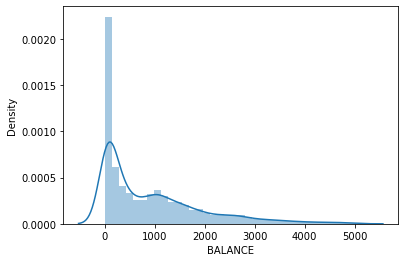

In [13]:
sns.distplot(df['BALANCE'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

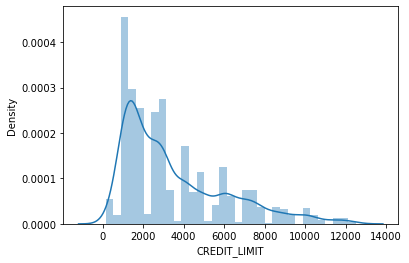

In [14]:
sns.distplot(df['CREDIT_LIMIT'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PAYMENTS', ylabel='Density'>

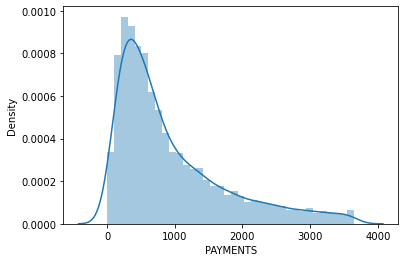

In [15]:
sns.distplot(df['PAYMENTS'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

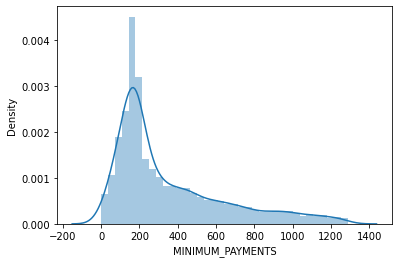

In [16]:
sns.distplot(df['MINIMUM_PAYMENTS'])

# K-Means Model

In [17]:
# dataframe that will be used in algorithm
X = df[['BALANCE','CREDIT_LIMIT']]
X.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
2,2495.148862,7500.0
4,817.714335,1200.0
7,1823.652743,2300.0
8,1014.926473,7000.0


In [18]:
# initialize KMeans to create 5 clusters
kmeans = KMeans(n_clusters=5)

In [19]:
# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(X)

KMeans(n_clusters=5)

In [20]:
len(df)

6467

In [21]:
# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(0=Age, 1=Income, 2=Score)
kmeans.cluster_centers_


array([[ 380.707595  , 6309.87935231],
       [ 625.01924684, 1367.31328321],
       [2912.07773595, 5651.62523901],
       [1578.69144036, 9719.10229645],
       [ 852.48360739, 3167.33498915]])

In [22]:
# create column in original dataframe with cluster group number
df['cluster'] = kmeans.labels_
df.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,cluster
0,40.900749,95.40,1000.0,201.802084,139.509787,1
2,2495.148862,773.17,7500.0,622.066742,627.284787,2
4,817.714335,16.00,1200.0,678.334763,244.791237,1
7,1823.652743,436.20,2300.0,679.065082,532.033990,4
8,1014.926473,861.49,7000.0,688.278568,311.963409,0


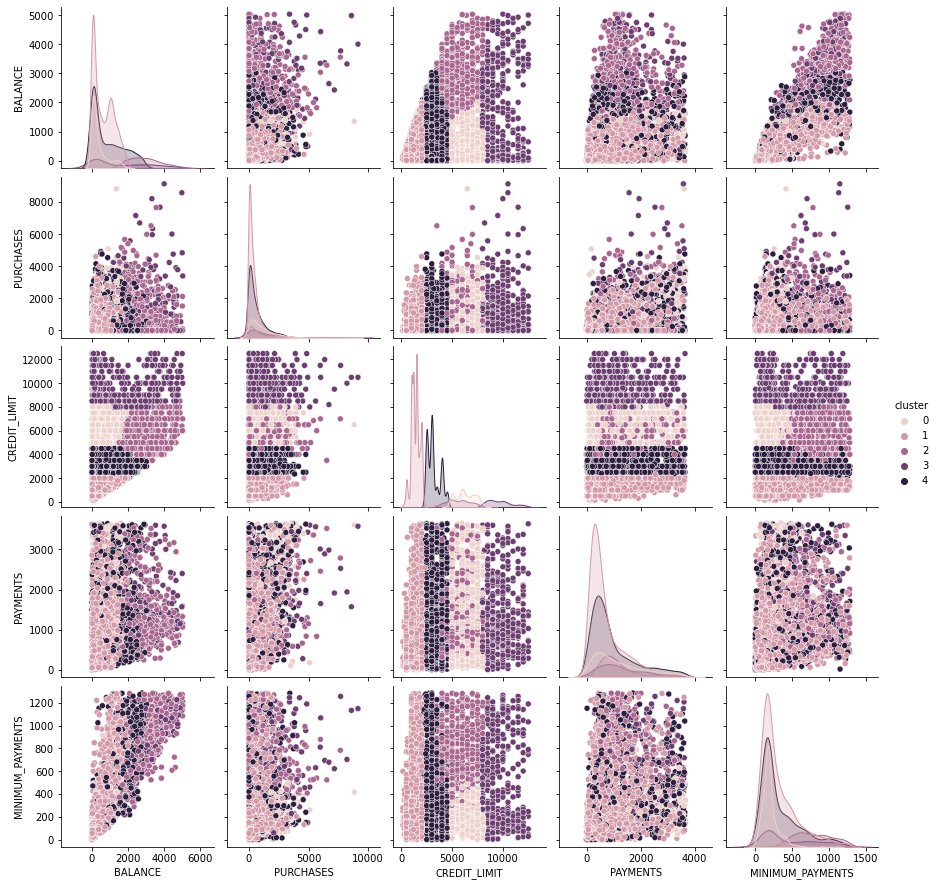

In [23]:
# compare all numerical features by cluster group
sns.pairplot(data=df, hue='cluster')

# Cluster Analysis

The plot comparing `Credit Limit` and `Balance` has the most distinction with the clusters, so let's explore the locations of the centroids. Then we will analyze the cluster groups to determine the characteristics of the customer segments.

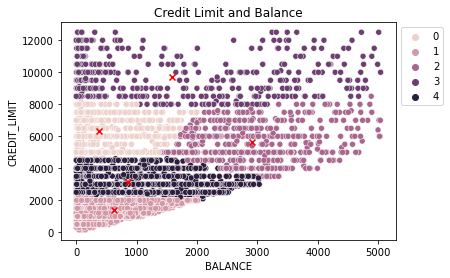

In [24]:
# compare "Income" and "Score"
sns.scatterplot(data=df, x='BALANCE', y='CREDIT_LIMIT', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.title("Credit Limit and Balance")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [25]:
# select a cluster from dataframe
cluster = df.loc[df['cluster'] == 0]
cluster.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,cluster
8,1014.926473,861.49,7000.0,688.278568,311.963409,0
13,921.693369,2137.93,7500.0,1655.891435,251.137986,0
29,22.063490,100.00,6900.0,160.767773,159.684442,0
31,1162.273324,1347.71,6000.0,645.998299,256.848991,0
72,656.013010,0.00,7000.0,910.457985,140.983193,0


In [26]:
# number of customers in this cluster
len(cluster)

859

In [27]:
# descriptive statistics for this cluster
cluster.describe()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,cluster
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.0
mean,380.707595,1009.584214,6309.879352,1185.750176,194.742334,0.0
std,466.908215,985.978713,926.136540,914.286953,115.667506,0.0
min,0.000000,0.000000,4700.000000,38.718362,0.117036,0.0
25%,51.504261,274.505000,5500.000000,431.597181,135.011084,0.0
50%,167.356680,738.650000,6000.000000,905.343134,175.422323,0.0
75%,531.841961,1461.940000,7000.000000,1740.893730,215.653229,0.0
max,2000.797758,8820.670000,8100.000000,3652.818025,1112.634979,0.0


## Analyze Credit Limit range of clusters

In [28]:
# sort the cluster numbers from min(0) to max(4)
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Credit Limit Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    min_credit_limit = small_df['CREDIT_LIMIT'].min()
    max_credit_limit = small_df['CREDIT_LIMIT'].max()
    avg_score = small_df['BALANCE'].mean()
    
    print(f"Cluster {cluster_num:}: ${min_credit_limit:,.0f}-${max_credit_limit:,.0f}, avg balance: {int(avg_score):,}$")

Cluster Credit Limit Ranges

Cluster 0: $4,700-$8,100, avg balance: 380$
Cluster 1: $150-$2,300, avg balance: 624$
Cluster 2: $3,500-$8,500, avg balance: 2,912$
Cluster 3: $8,000-$12,500, avg balance: 1,578$
Cluster 4: $2,100-$4,600, avg balance: 853$


## Customer Segments

After analyzing the income ranges and average spending score of each clusters, we identified these groups of shopper behavior:

- Average credit limit, moderately spends
- Lower credit limit, slightly high spends
- Average credit limit, highly spends
- High credit limit, highly spends
- Lower credit limit, highly spends

This information can be used to classify customer's spending by controlling their credit limits.

In [30]:
# new customer with balance = $700, credit limit = $2,500
customer = [700, 2500]

customer_spending = kmeans.predict([customer])

print(f"Cluster assignment: {customer_spending}")

Cluster assignment: [4]


# Conclusions

This customer that have a lower credit limit and highly spends. Although we don't need to offer them many incentives to shop at the store, if there is a customer loyalty program then this customer could be upgraded to a higher tier so that they will continue to be a dedicated shopper.